In [1]:
base_url = 'https://api.bls.gov/publicAPI/v1/timeseries/data/'

In [2]:
series = {'id': 'LNS11300000',
          'name': 'Labor Force Participation Rate'}

In [3]:
data_url = '{}{}'.format(base_url, series['id'])
print(data_url)

https://api.bls.gov/publicAPI/v1/timeseries/data/LNS11300000


In [8]:
import requests

r = requests.get(data_url, verify=False).json()
print('Status: ' + r['status'])

C:\Users\16308\anaconda3\lib\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bls.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


Status: REQUEST_SUCCEEDED


In [9]:
print(r.keys())

dict_keys(['status', 'responseTime', 'message', 'Results'])


In [10]:
r = r['Results']['series'][0]['data']
print(r[0])

{'year': '2022', 'period': 'M01', 'periodName': 'January', 'latest': 'true', 'value': '62.2', 'footnotes': [{}]}


In [11]:
import pandas as pd

dates = ['{} {}'.format(i['period'], i['year']) for i in r]
index = pd.to_datetime(dates)
data = {series['id']: [float(i['value']) for i in r],
        'footnotes': [i['footnotes'][0] for i in r]}

df = pd.DataFrame(index=index, data=data).iloc[::-1]

df.tail(3)

,LNS11300000,footnotes
2021-01-01 00:00:11,61.9,{}
2021-01-01 00:00:12,61.9,{}
2022-01-01 00:00:01,62.2,{}


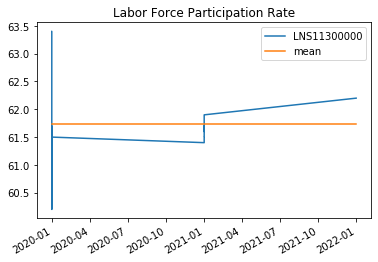

In [12]:
%matplotlib inline

df['mean'] = df[series['id']].mean()
df[[series['id'], 'mean']].plot(title=series['name'])

In [13]:
import config # .py file with bls_key = 'API key here'

# The url for BLS API v2
url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'

In [14]:
key = '?registrationkey={}'.format(config.bls_key)

In [15]:
# Series stored as a dictionary
series_dict = {
    'LNS14000003': 'White',
    'LNS14000006': 'Black',
    'LNS14000009': 'Hispanic'}

# Start year and end year
dates = ('2019', '2021')

In [16]:
import json

# Specify json as content type to return
headers = {'Content-type': 'application/json'}

In [17]:
data = json.dumps({
    "seriesid": list(series_dict.keys()),
    "startyear": dates[0],
    "endyear": dates[1]})

In [18]:
p = requests.post(
    '{}{}'.format(url, key),
    headers=headers,
    data=data).json()['Results']['series']

In [19]:
# Date index from first series
date_list = [f"{i['year']}-{i['period'][1:]}-01" for i in p[0]['data']]

# Empty dataframe to fill with values
df = pd.DataFrame()

# Build a pandas series from the API results, p
for s in p:
    df[series_dict[s['seriesID']]] = pd.Series(
        index = pd.to_datetime(date_list),
        data = [i['value'] for i in s['data']]
        ).astype(float).iloc[::-1]

# Show last 5 results
df.head()

,White,Black,Hispanic
2019-01-01,3.5,7.0,4.7
2019-02-01,3.2,7.1,4.3
2019-03-01,3.3,6.5,4.5
2019-04-01,3.2,6.5,4.1
2019-05-01,3.3,6.1,4.2


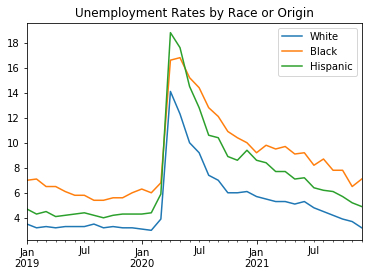

In [20]:
# Simple line plot of the data
df.plot(title='Unemployment Rates by Race or Origin')